## Project Scenario

You are a Data Scientist with a housing agency in Boston MA, you have been given access to a previous dataset on housing prices derived from the U.S. Census Service to present insights to higher management. Based on your experience in Statistics, what information can you provide them to help with making an informed decision? Upper management will like to get some insight into the following.

Is there a significant difference in the median value of houses bounded by the Charles river or not?

Is there a difference in median values of houses of each proportion of owner-occupied units built before 1940?

Can we conclude that there is no relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town?

What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes?


## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats

## Defination of Column names

| Column Name | Description | 
| --- | --- | 
| CRIM | per capita crime rate by town | 
| ZN | proportion of residential land zoned for lots over 25,000 sq.ft | 
| INDUS | proportion of non-retail business acres per town | 
| CHAS | Charles River dummy variable (1 if tract bounds river; 0 otherwise) |
| NOX | nitric oxides concentration (parts per 10 million) |
| RM | average number of rooms per dwelling |
| AGE | proportion of owner-occupied units built prior to 1940 |
| DIS | weighted distances to five Boston employment centres |
| RAD | index of accessibility to radial highways |
| TAX | full-value property-tax rate per $10,000 |


## Import and Explore Dataset

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)


In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [6]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


## Task 4: Generate Descriptive Statistics and Visualizations

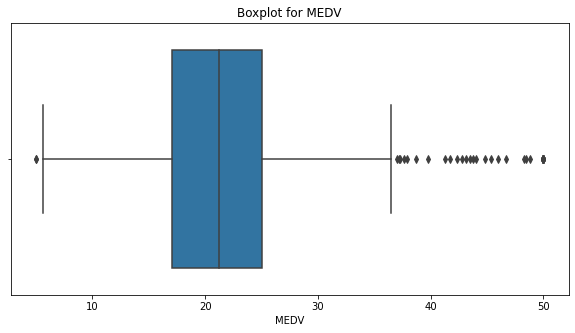

In [7]:
#Boxplot for "Median value of owner-occupied homes" 
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV)
plt.title("Boxplot for MEDV")
plt.show()

Note: The median value of owner-occupied home is around 21.

/opt/conda/envs/Python-3.8-main/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


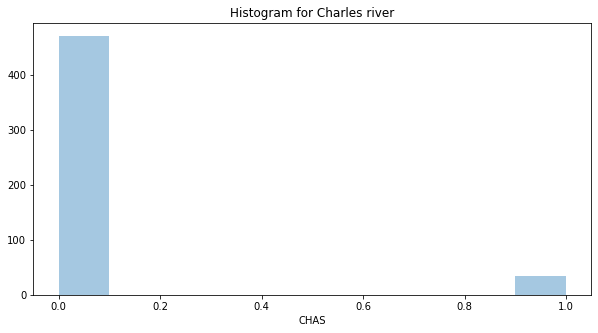

In [9]:
#Histogram for the Charles river variable
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.CHAS,bins=10, kde=False)
plt.title("Histogram for Charles river")
plt.show()

Note: Majority tracts don't bound Charles River

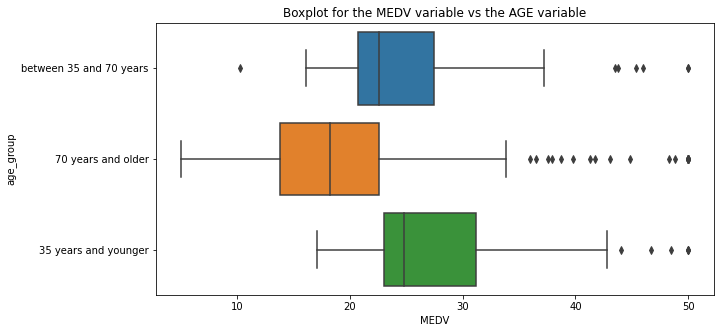

In [11]:
#Provide a boxplot for the MEDV variable vs the AGE variable. 
#Discretize the age variable into three groups of 35 years and younger, 
#between 35 and 70 years and 70 years and older)

boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

#Boxplot for the MEDV variable vs the AGE variable
plt.figure(figsize=(10,5))
sns.boxplot(x=boston_df.MEDV, y=boston_df.age_group, data=boston_df)
plt.title("Boxplot for the MEDV variable vs the AGE variable")
plt.show()

Note: MEDV is highest for the age group <35.

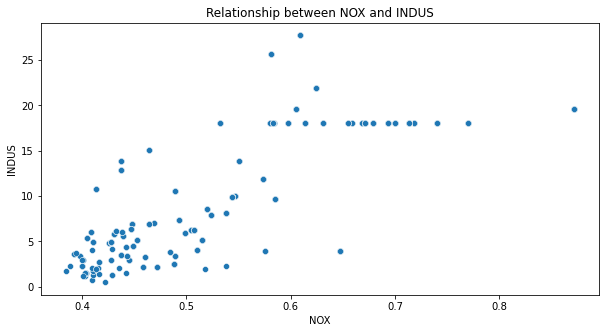

In [12]:
#Scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

plt.figure(figsize=(10,5))
sns.scatterplot(x=boston_df.NOX, y=boston_df.INDUS, data=boston_df)
plt.title("Relationship between NOX and INDUS")
plt.show()

Note: There is a linear relationship till NOX=0.6

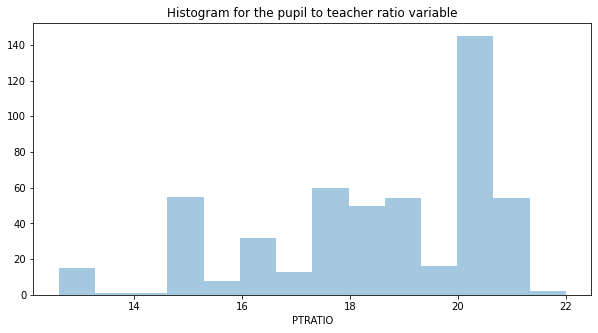

In [15]:
#Histogram for the pupil to teacher ratio variable
plt.figure(figsize=(10,5))
sns.distplot(a=boston_df.PTRATIO, kde=False)
plt.title("Histogram for the pupil to teacher ratio variable")
plt.show()

Note: Pupil to teacher ratio is highest at 20-21 range.

## Task 5: Use the appropriate tests to answer the questions provided. 

Q1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Null Hypothesis(H0): Both average MEDV are the same
Alternative Hypothesis(H1): Both average MEDV are NOT the same

In [16]:
##MEDV not bounded by the Charles River
a = boston_df[boston_df["CHAS"] == 0]["MEDV"]
a

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 471, dtype: float64

In [17]:
##MEDV bounded by the Charles River
b = boston_df[boston_df["CHAS"] == 1]["MEDV"]
b

142    13.4
152    15.3
154    17.0
155    15.6
160    27.0
162    50.0
163    50.0
208    24.4
209    20.0
210    21.7
211    19.3
212    22.4
216    23.3
218    21.5
219    23.0
220    26.7
221    21.7
222    27.5
234    29.0
236    25.1
269    20.7
273    35.2
274    32.4
276    33.2
277    33.1
282    46.0
283    50.0
356    17.8
357    21.7
358    22.7
363    16.8
364    21.9
369    50.0
370    50.0
372    50.0
Name: MEDV, dtype: float64

In [18]:
scipy.stats.ttest_ind(a, b, axis=0, equal_var=True)

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

Conculsion: Since pvalue is less than 0.05, null hypothesis is rejected and there is a significant difference in median value of houses bounded by the Charles river

Q2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Null Hypothesis(H0): Three age group has similar mean MEDV
Alternative Hypothesis(H1): At least one of the age group is not similar 

In [25]:
boston_df.loc[(boston_df["AGE"] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[(boston_df["AGE"] > 35) & (boston_df["AGE"]<70),'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df["AGE"] >= 70),'age_group'] = '70 years and older'

low = boston_df[boston_df["age_group"] == '35 years and younger']["MEDV"]
mid = boston_df[boston_df["age_group"] == 'between 35 and 70 years']["MEDV"]
high = boston_df[boston_df["age_group"] == '70 years and older']["MEDV"]

scipy.stats.f_oneway(low,mid,high)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

Conculsion: Since pvalue is larger than 0.05, null hypothesis is accepted and there is no significant difference between three age groups.

Q3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Null Hypothesis(H0): No relationship between NOX and INDUS
Alternative Hypothesis(H1): Have relationship between NOX and INDUS

In [26]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

(0.7636514469209151, 7.913361061238693e-98)

Conculsion: Since pvalue is less than 0.05, null hypothesis is rejected and there is a relationship between NOX and INDUS

Q4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)


In [29]:
y = boston_df['MEDV']
x = boston_df['DIS']

x = sm.add_constant(x)
result = sm.OLS(y,x).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Fri, 31 Dec 2021   Prob (F-statistic):           1.21e-08
Time:                        05:01:01   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
np.sqrt(0.062)

0.24899799195977465

The square root of R-squared is 0.25, which implies weak correlation between both features